## Topic :  Sports
Problem Statement: Company’s management wants to invest on proposals
on managing some of the best teams in the league. The analytics department
has been assigned with a task of creating a report on the performance shown by
6
the teams. Some of the older teams are already in contract with competitors.
Hence Company X wants to understand which teams they can approach which
will be a deal win for them.

# Statistics and Exploratory Data Analysis Project -SET 1


## PART-A ( Concept Based)--25 points

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [50]:
l=[42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22]
df=pd.DataFrame({'age':l})
df

,age
0,42
1,44
2,62
3,35
4,20
5,30
6,56
7,20
8,23
9,41


## Q1. Compute the mean, median and the mode of the data

In [3]:
# mean
mean=df['age'].mean()
print('Mean of the age is ',mean)

# median
median=df['age'].median()
print('Median of the age is ',median)

# mode
mode=df['age'].mode()
print('Mode of the age is \n',mode)

Mean of the age is  34.46666666666667
Median of the age is  31.5
Mode of the age is 
 0    18
1    20
2    22
3    31
4    36
5    42
Name: age, dtype: int64


## Q2. Compute the range , variance and standard deviation of customer ages

In [4]:
# range
ran=df['age'].max()-df['age'].min()
print('The range is ',ran)

# variance
variance=df['age'].var()
print('The variance is ',variance)

# standard deviation
std=df['age'].std()
print('The standard deviation is ',std)

The range is  48
The variance is  177.36091954022984
The standard deviation is  13.317691974971858


## Q3. Find the mean deviation for the data. 


In [5]:
# mean deviation
mean= df['age'].mean()
length=len(df)
mean

34.46666666666667

In [6]:
md= sum(np.abs(df['age']-mean)/length)
print('The Mean Deviation is ',md)

The Mean Deviation is  10.764444444444441


## Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [7]:
s=df['age'].std()
md=df['age'].median()
skewness=(3*(mean-md))/s
print('The skewness of the data is ',skewness)

The skewness of the data is  0.668283965173989


## Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.


In [8]:
left_standard_deviation = mean-2*std
right_standard_deviation=mean+2*std
fall_values=df[(df['age']>=left_standard_deviation)&(df['age']<=right_standard_deviation)]
count=len(fall_values)
print(count,'data values that fall within two standard deviations of the mean')

28 data values that fall within two standard deviations of the mean


In [9]:
percentage=(count/len(df))*100
print(round(percentage,3), 'percentage of data values that fall within two standard deviations  of the mean')

93.333 percentage of data values that fall within two standard deviations  of the mean


## Q6. Find the three quartiles and the interquartile range (IQR).

In [10]:
Q1=df['age'].quantile(0.25)
Q2=df['age'].quantile(0.50)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
print('The First Quantile  is ',Q1)
print('The Second Quantile is ',Q2)
print('The Third Quantile  is ',Q3)
print('The Inter Quantile Range is ',IQR)

The First Quantile  is  23.25
The Second Quantile is  31.5
The Third Quantile  is  41.75
The Inter Quantile Range is  18.5


## Q7. Are there any outliers in the data set ?

In [11]:
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
df[(df['age']<LL)|(df['age'])>UL]

,age


## Q8. Draw a boxplot of the dataset to confirm .

<AxesSubplot:xlabel='age'>

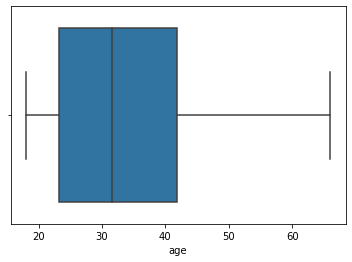

In [12]:
sns.boxplot(data=df,x='age')

## Q9. Find the percentile rank of the datapoint 50.


In [13]:
df['rank']=(df['age'].rank(pct=True))*100
df[df['age']==50]

,age,rank
21,50,86.666667


## Q10. What is the probability that a person ordering an EV scooter is above 50 years old?


In [14]:
favourable_outcome=len(df[df['age']>50])
probability=(favourable_outcome/len(df))
probability

0.13333333333333333

## Q11. Create a frequency distribution for the data and visualize it appropriately


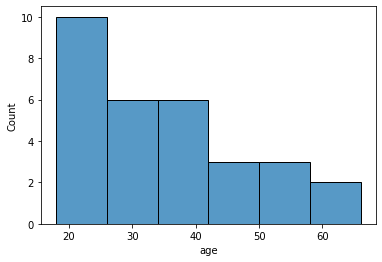

In [15]:
sns.histplot(data=df,x='age')
plt.show()

## Q12. Create a probability distribution of the data and visualize it appropriately.


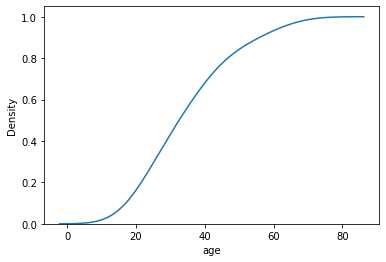

In [16]:
sns.kdeplot(df['age'],cumulative=True)
plt.show()

 ### ***Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?***


In [17]:
# shape of the distribution of the dataset
df.shape

(30, 2)

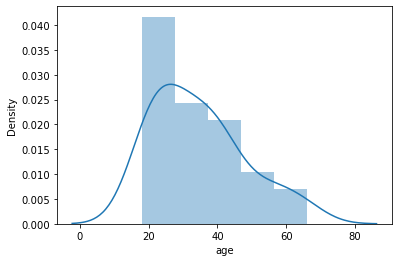

In [18]:
sns.distplot(df['age'])
plt.show()

In [19]:
def sampling_distribution(data,no_of_sample,sample_size):
    sample_mean_list=[]
    for i in range(no_of_sample):
        sample=random.choices(data,k=sample_size)
        sample_mean=np.mean(sample)
        sample_mean_list.append(sample_mean)
    return sample_mean_list

Text(0.5, 1.0, 'sample size = 30')

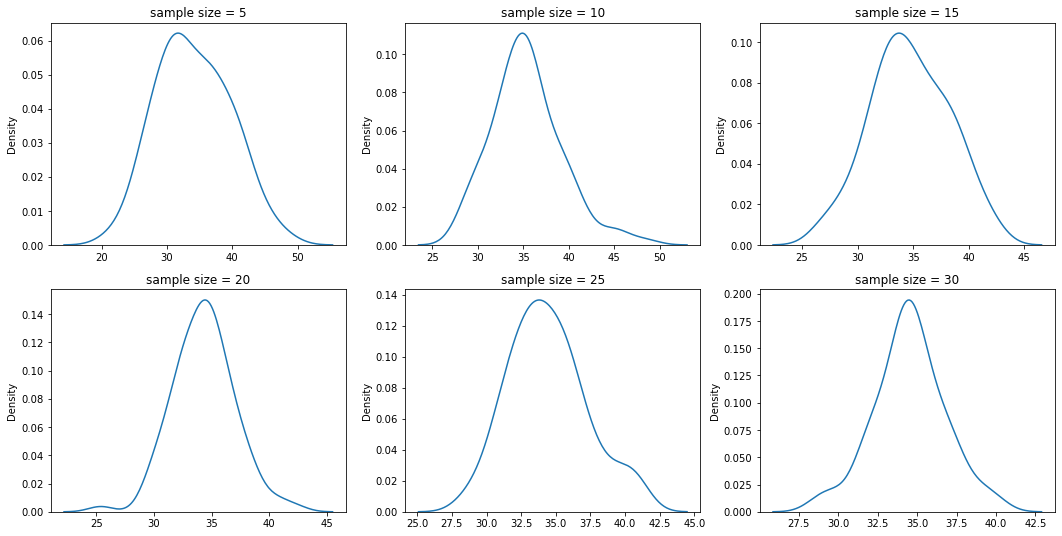

In [20]:
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
sns.kdeplot(x=sampling_distribution(df['age'],100,5))
plt.title('sample size = 5')
plt.subplot(2,3,2)
sns.kdeplot(x=sampling_distribution(df['age'],100,10))
plt.title('sample size = 10')
plt.subplot(2,3,3)
sns.kdeplot(x=sampling_distribution(df['age'],100,15))
plt.title('sample size = 15')
plt.subplot(2,3,4)
sns.kdeplot(x=sampling_distribution(df['age'],100,20))
plt.title('sample size = 20')
plt.subplot(2,3,5)
sns.kdeplot(x=sampling_distribution(df['age'],100,25))
plt.title('sample size = 25')
plt.subplot(2,3,6)
sns.kdeplot(x=sampling_distribution(df['age'],100,30))
plt.title('sample size = 30')

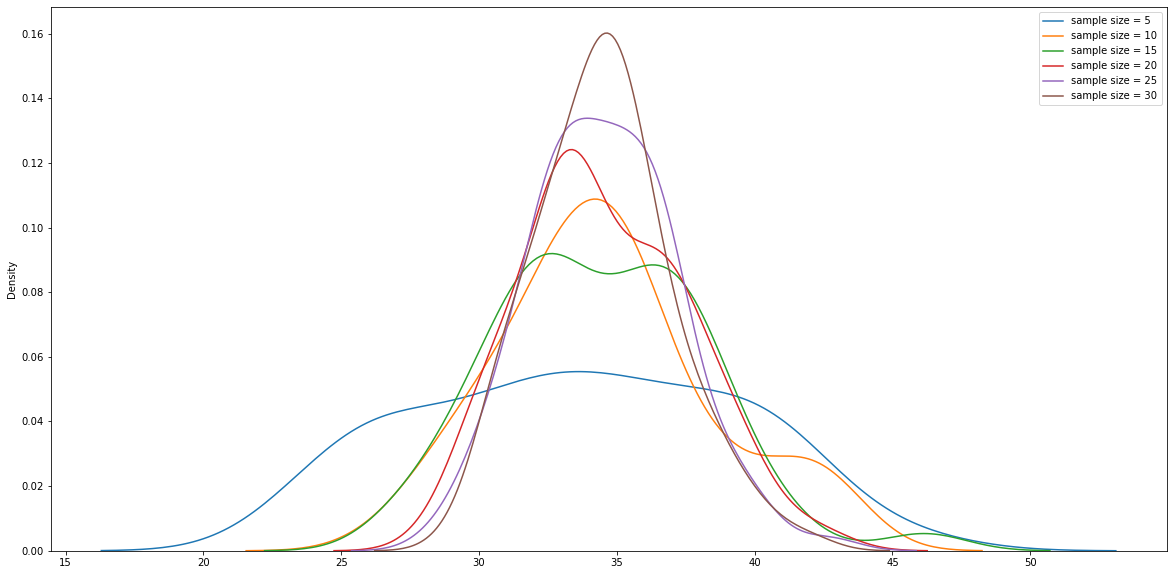

In [51]:
plt.figure(figsize = (20,10))                     

num_samples = 100
sample_sizes = [5, 10, 15, 20, 25, 30]


for sample_size in sample_sizes: # sampling 100 times for each sample size.
    sample_means = []
    for times in range(num_samples):
        sample = np.random.choice(a = df['age'], size = sample_size)
        sample_means.append(sample.mean())
    # Plotting the curve for each case.  
    titlee = 'sample size = ' + str(sample_size)
    sns.kdeplot(data = sample_means, label = titlee)
    plt.legend()
    
plt.show()

### Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [21]:
x=len(df[df['age']>50])
n=10
p=x/len(df)
stats.binom.pmf(6,n,p)

0.0006656716898846715

### Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly25 will be above 50 years of age.
### [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity  P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [22]:
x=25
n=300
print(f"The probability that out of a random sample of 300 buyers exactly 25 are above 50 years of age is {stats.binom.pmf(x,n,p)}")

The probability that out of a random sample of 300 buyers exactly 25 are above 50 years of age is 0.0021064699054422664


### Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.  ( State reasons as to why did you use a z or t distribution)

In [23]:
# mean,standard deviation
x_bar=np.mean(df['age'])
sigma=np.std(df['age'])
n=len(df)
# alpha
c=0.95
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)

# margin of error
me=(z_alpha*sigma)/(np.sqrt(n))

# confidence inteval
CI=(x_bar-me),(x_bar+me)
print('Confidence inteval for population of EV scooter buyers is:\n ',CI)

Confidence inteval for population of EV scooter buyers is:
  (29.781178977640657, 39.15215435569268)


### Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.


In [24]:
c=0.95
alpha=1-c
z_alpha =stats.norm.isf(alpha/2)
me=0.02
p=0.20
q=1-p

# sample size
n=(z_alpha*((np.sqrt(p*q))/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  1537


### Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary

In [25]:
c=0.90
alpha=1-c
z_alpha =stats.norm.isf(alpha/2)
me=0.05
p=0.20
q=1-p

# sample size
n=(z_alpha*((np.sqrt(p*q))/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  173


In [26]:
z_alpha

1.6448536269514729

### Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

In [27]:
# testing hypothesis
# h0: mu=0.2
# ha: mu<>0.2   

# desicion criteria
alpha=0.05
z_alpha=stats.norm.ppf(alpha/2)

# simple statistics
n=30
p=5/30
p_bar=0.20
z=(p-p_bar)/(np.sqrt((p_bar*(1-p_bar))/n))
print('z_alpha is ',round(z_alpha,3))
print('z is ',round(z,3))

z_alpha is  -1.96
z is  -0.456


### Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test mileage. Zen claims that the new EVs get a mileage of 96 kmpl on thehighway. Your results show a mean of 91.3 kmpl and a standard deviation of 14.4.
### a. Show why you support Zen’s claim using the P-value obtained.


In [28]:
# testing hypothesis
# ho: mu = 96
# ha: mu<> 96

# decision criteria
alpha=0.05

# simple statistics
x_bar=91.3
sigma=14.4
n=40
z=(x_bar-96)/(sigma/(np.sqrt(n)))
p_value = stats.norm.sf(z)
p_value_into2=p_value*2
print('p_value is ',round(p_value_into2,4))
print('alpha is ',alpha)


p_value is  1.961
alpha is  0.05


In [29]:
p_value

0.9805036814872364

### b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]

In [30]:
# testing hypothesis
# H0 : sigma=7.2
# Ha : sigma<>7.2

# decision criteria
alpha=0.05
n=40
chisq_critical=stats.chi2.isf(alpha,df=n-1)
s=14.4
sigma=7.2

# chisquare
chi_sq=((n-1)*s**2)/(sigma**2)
print('chisq_critical',round(chisq_critical,4))
print('chi_sq ',chi_sq)


chisq_critical 54.5722
chi_sq  156.0


### c. Write a summary of results and the action that Zen must take to remedy the complaints.

### d. What is your position on performing the test for variability along with the test for means?

### Q21. Write a report comparing and contrasting Descriptive vs InferentialStatistics in about 200-500 words and how each helps to get more insight into the data at hand. 

**Descriptive statistics** 

1. Descriptive statistics is very important to present our raw data ineffective/meaningful way using numerical calculations or graphs or tables.
2. It helps in organizing, analyzing, and to present data in a meaningful manner.
3. It is used to describe a situation.
4. We can use descriptive statistics to describe both an entire population or an individual sample.
5. It can be achieved with the help of charts, graphs, tables, etc.
6. Descriptive statistics are used to describe the characteristics or features of a dataset.

            **Types of Descriptive Statistics**

1. **Measure of Central Tendency** - The central tendency is the method of making use of the mean and the median to find the data location on the graph.
2. **Measure of Variability** - Variability is most commonly measured with the following descriptive statistics: Range: the difference between the highest and lowest values. Interquartile range: the range of the middle half of a distribution. Standard deviation: average distance from the mean.

**Inferential statistics** 


1. It can be defined as a random sample of data taken from a population to describe and make inferences about the population.
2. It allows us to compare data, and make hypotheses and predictions.
3. It is used to explain the chance of occurrence of an event.
4. Inferential statistics focus on making generalizations about a larger population based on a representative sample of that population.
5. It can be achieved by probability.
6. Allow you to test a hypothesis or assess whether your data is generalizable to the broader population.

          **Some ways in which inferential Statistics can be measured is through**
          
* Hypothesis test that determines if the population that is being measured has a high value as compared to the other data points in the analysis. It can also help to conclude if the population varies which is based on the results that you have earned from various experiments.
* The confidence interval discovers the error margin in the research and finds out if it affects the testing. You will have to estimate the population range and if it falls under the median or means calculation.

                   ** difference between them ** 
                   
* The descriptive analysis gives information about the raw data that describes the data in a particular manner. The inferential analysis makes the inference about a population which is done using the data that is drawn from a population.
* Descriptive Statistics helps to organize, analyze, and present the data in a meaningful way. Inferential statistics allows comparing data and making predictions and hypotheses with it.
* Descriptive Statistics is used in order to describe a situation whereas inferential Statistics is used to explain the chances of the occurrence of an event
* Descriptive Statistics explains the data that is already known and is limited to a population or a sample of a small size. Inferential Statistics tries to reach out to a conclusion about the population.
* Descriptive Statistics can be done using graphs, charts, and tables. Inferential Statistics is achieved through probability.
* Descriptive Statistics has a tabular or diagrammatic representation of the final result whereas inferential Statistics represents the result in the probability form.
* Descriptive Statistics describes the situation where inferential Statistics explains the likelihood if the event will occur.
* Descriptive Statistics measures only the group that is assigned for the experiment which means that when you do the descriptive analysis you decide to not consider in the variables. In the case of inferential Statistics, you account for the sampling errors which may make you conduct additional tests that need to be on a large population depending on the amount of data that is required. In other words, you are likely to get a definite calculation when you use descriptive statistics.
* Since you are testing the variables using inferential Statistics it is easy to arrive at conclusions when you use descriptive statistics. 

## PART-B ( Dataset based)--25 points

### 1. Read the data set, clean the data and prepare a final dataset to be used for analysis.[ 5 points]


In [31]:
df=pd.read_csv('Basketball.csv')
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [33]:
df1=df.drop(index=60)
df.head(2)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1


In [34]:
df1['Score']=df1['Score'].astype(int)
df1['PlayedGames']=df1['PlayedGames'].astype(int)
df1['WonGames']=df1['WonGames'].astype(int)
df1['DrawnGames']=df1['DrawnGames'].astype(int)
df1['LostGames']=df1['LostGames'].astype(int)
df1['BasketScored']=df1['BasketScored'].astype(int)
df1['BasketGiven']=df1['BasketGiven'].astype(int)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     int32 
 3   PlayedGames          60 non-null     int32 
 4   WonGames             60 non-null     int32 
 5   DrawnGames           60 non-null     int32 
 6   LostGames            60 non-null     int32 
 7   BasketScored         60 non-null     int32 
 8   BasketGiven          60 non-null     int32 
 9   TournamentChampion   60 non-null     object
 10  Runner-up            60 non-null     object
 11  TeamLaunch           60 non-null     object
 12  HighestPositionHeld  60 non-null     int64 
dtypes: int32(7), int64(2), object(4)
memory usage: 4.6+ KB


In [35]:
# TournamentChampion and Runner-up converting the datatypes
df1[['TournamentChampion','Runner-up']]=df1[['TournamentChampion','Runner-up']].apply(lambda x: x.replace('-',0).astype(int))

In [36]:
df1['TeamLaunch'].value_counts(normalize=True)

1929        0.166667
1941-42     0.033333
1939-40     0.033333
1963-64     0.033333
1935-36     0.033333
1977-78     0.033333
1994-95     0.016667
1978-79     0.016667
1971-72     0.016667
1999to00    0.016667
2014-15     0.016667
1990-91     0.016667
1947-48     0.016667
1995-96     0.016667
1996-97     0.016667
2007-08     0.016667
1945-46     0.016667
1953-54     0.016667
1979-80     0.016667
1950-51     0.016667
2016_17     0.016667
2009-10     0.016667
1956-57     0.016667
1951~52     0.016667
1962-63     0.016667
1943-44     0.016667
1991_92     0.016667
1987-88     0.016667
1934-35     0.016667
1932-33     0.016667
1941to42    0.016667
1948-49     0.016667
1944_45     0.016667
1949_50     0.016667
1933to34    0.016667
1960-61     0.016667
1951-52     0.016667
1998-99     0.016667
1959-60     0.016667
2004to05    0.016667
1961-62     0.016667
1940-41     0.016667
1930-31     0.016667
1974-75     0.016667
1931to32    0.016667
1955-56     0.016667
Name: TeamLaunch, dtype: float64

In [37]:
df1['TeamLaunch']=df1['TeamLaunch'].str[:4]

In [38]:
# cleaning team column 
df1['Team']=list(map(lambda x : x.lstrip('Team'),df1['Team']))

In [39]:
# df1 cleaned dataset
df1.dtypes

Team                   object
Tournament              int64
Score                   int32
PlayedGames             int32
WonGames                int32
DrawnGames              int32
LostGames               int32
BasketScored            int32
BasketGiven             int32
TournamentChampion      int32
Runner-up               int32
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [40]:
df1

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


### 2. Perform detailed statistical analysis and EDA using univariate, bi-variate andmultivariate EDA techniques to get data driven insights on recommending whichteams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data.[ 15 points]

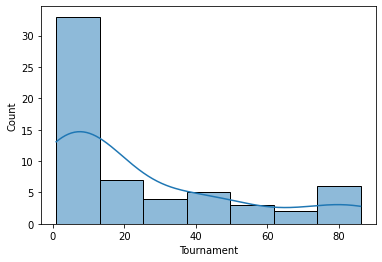

In [41]:
# tournament
sns.histplot(data=df1,x='Tournament',kde=True)
plt.show()

In [42]:
# team that are qualified which have played 50 or above tournamnets
df1_qualified=df1[df1['Tournament']>=50]
df1_qualified

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


In [43]:
# winning percentage
df1_qualified['Game_Winning_pct']=((df1_qualified['WonGames'])/(df1_qualified['PlayedGames']))*100
df1_qualified

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Game_Winning_pct
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957
6,7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,36.100533
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580
8,9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,35.146022
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444


In [44]:
# basket percentage(whose percentage is high is not the best)
df1_qualified['Basket_ratio']=((df1_qualified['BasketGiven'])/(df1_qualified['BasketScored']))*100
df1_qualified

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Game_Winning_pct,Basket_ratio
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702,52.799731
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130,52.779661
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134,72.981914
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057,78.876762
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629,79.896351
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957,91.657609
6,7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,36.100533,107.758382
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580,100.061958
8,9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,35.146022,106.112561
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444,115.423807


In [45]:
# team that are semi finalist which have HighestPositionHeld 1
df1_qualified=df1_qualified[df1_qualified['HighestPositionHeld']==1]
df1_qualified

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Game_Winning_pct,Basket_ratio
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702,52.799731
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130,52.779661
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134,72.981914
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057,78.876762
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629,79.896351
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957,91.657609
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580,100.061958
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444,115.423807


In [46]:
# tournament winning pct
df1_qualified['Tournament_winning_pct']=(df1_qualified['TournamentChampion']/df1_qualified['Tournament'])*100
df1_qualified

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Game_Winning_pct,Basket_ratio,Tournament_winning_pct
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702,52.799731,38.372093
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130,52.779661,29.069767
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134,72.981914,12.500000
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057,78.876762,7.317073
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629,79.896351,9.302326
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957,91.657609,1.369863
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580,100.061958,2.857143
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444,115.423807,1.960784


<AxesSubplot:>

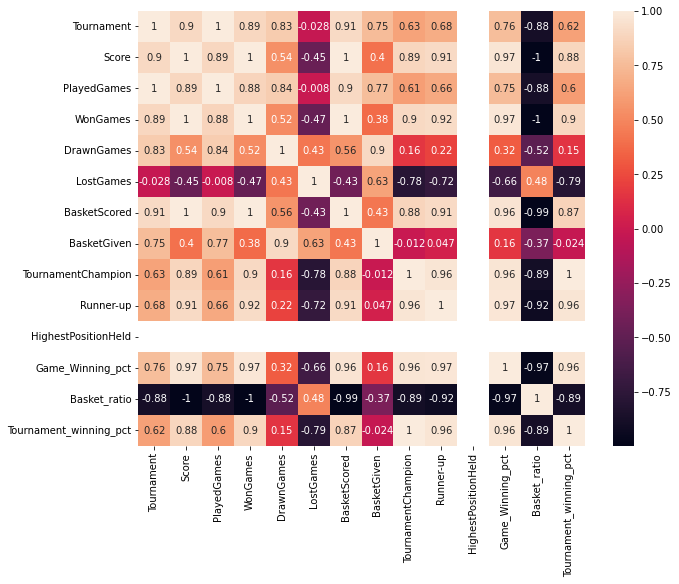

In [47]:
# finding correlation between two variables
plt.figure(figsize=(10,8))
sns.heatmap(df1_qualified.corr(),annot=True)

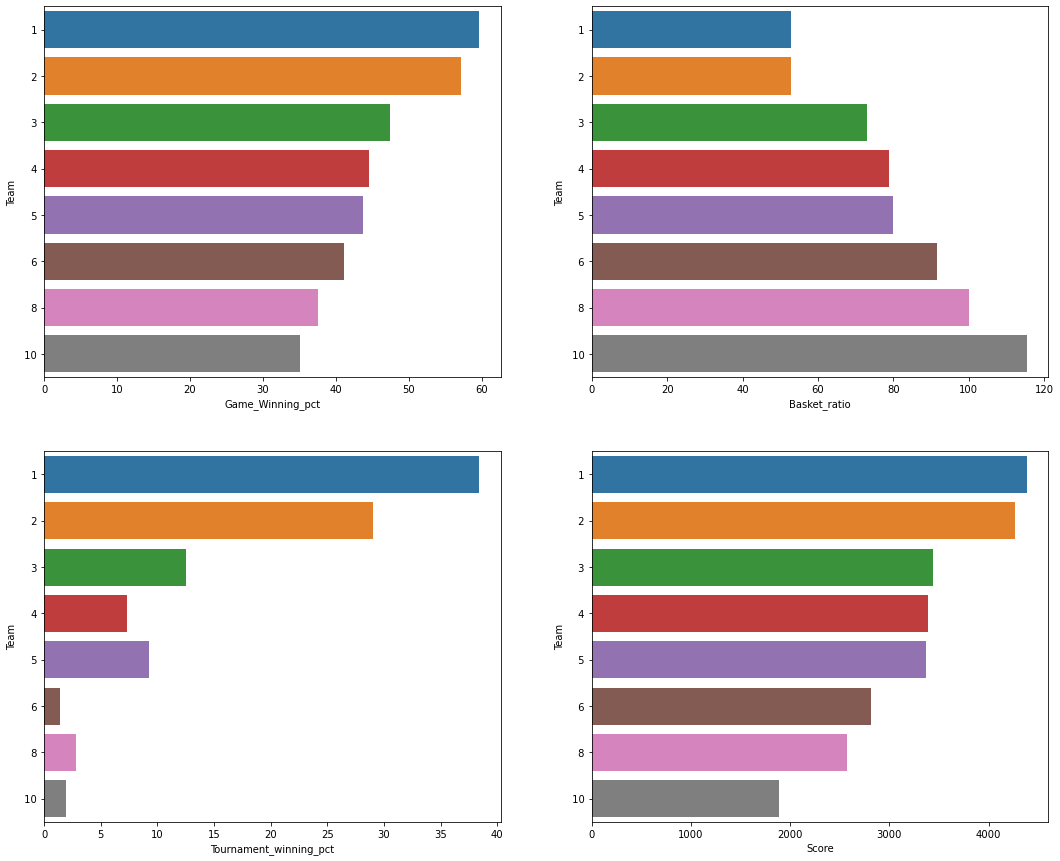

In [48]:
# visualizing the finalist from this
plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
sns.barplot(data=df1_qualified,y='Team',x='Game_Winning_pct')
plt.subplot(2,2,2)
sns.barplot(data=df1_qualified,y='Team',x='Basket_ratio')
plt.subplot(2,2,3)
sns.barplot(data=df1_qualified,y='Team',x='Tournament_winning_pct')
plt.subplot(2,2,4)
sns.barplot(data=df1_qualified,y='Team',x='Score')
plt.show()

### 3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,veracity etc. on the data points collected by the association to perform a better data analysis in future.Submit a 200-500 words report to the management[5-points]